Convolutional Dictionary Learning with Spatial Mask
===================================================

This example demonstrates the use of [cbpdndl.ConvBPDNMaskDcplDictLearn](http://sporco.rtfd.org/en/latest/sporco.admm.cbpdndl.html#sporco.admm.cbpdndl.ConvBPDNMaskDcplDictLearn) for convolutional dictionary learning with a spatial mask, from a set of colour training images [[30]](http://sporco.rtfd.org/en/latest/zreferences.html#wohlberg-2016-convolutional). The dictionary learning algorithm is based on the hybrid mask decoupling / ADMM consensus dictionary update [[15]](http://sporco.rtfd.org/en/latest/zreferences.html#garcia-2017-convolutional).

In [1]:
from __future__ import print_function
from builtins import input
from builtins import range

import pyfftw   # See https://github.com/pyFFTW/pyFFTW/issues/40
import numpy as np

from sporco.admm import tvl2
from sporco.admm import cbpdndl
from sporco import util
from sporco import plot
plot.config_notebook_plotting()

Load training images.

In [2]:
exim = util.ExampleImages(scaled=True, zoom=0.25)
S1 = exim.image('barbara.png', idxexp=np.s_[10:522, 100:612])
S2 = exim.image('kodim23.png', idxexp=np.s_[:, 60:572])
S = np.stack((S1, S2), axis=3)

Construct initial dictionary.

In [3]:
np.random.seed(12345)
D0 = np.random.randn(8, 8, 3, 32)

Create random mask and apply to training images.

In [4]:
t = 0.5
W = np.random.randn(*(S.shape[0:3] + (1,)))
W[np.abs(W) > t] = 1;
W[np.abs(W) < t] = 0;
Sw = W * S

:math:`\ell_2`-TV denoising with a spatial mask as a non-linear lowpass
filter.

In [5]:
lmbda = 0.1
opt = tvl2.TVL2Denoise.Options({'Verbose': False, 'MaxMainIter': 200,
            'DFidWeight': W, 'gEvalY': False, 'AutoRho': {'Enabled': True}})
b = tvl2.TVL2Denoise(Sw, lmbda, opt, caxis=2)
sl = b.solve()
sh = Sw - sl

CDL without a spatial mask using [admm.cbpdndl.ConvBPDNDictLearn](http://sporco.rtfd.org/en/latest/sporco.admm.cbpdndl.html#sporco.admm.cbpdndl.ConvBPDNDictLearn).

In [6]:
lmbda = 0.05
opt1 = cbpdndl.ConvBPDNDictLearn.Options({'Verbose': True,
            'MaxMainIter': 200, 'AccurateDFid': True,
            'CBPDN': {'rho': 50.0*lmbda + 0.5},
            'CCMOD': {'ZeroMean': True}})
d1 = cbpdndl.ConvBPDNDictLearn(D0, sh, lmbda, opt1)
D1 = d1.solve()

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D       
--------------------------------------------------------------------------------------------------------


   0  2.31e+03  1.66e+03  1.29e+04  1.41e-15  3.38e-01  1.58e+00  3.00e+00  1.09e+00  6.87e-02  1.00e+00


   1  2.20e+03  1.57e+03  1.25e+04  1.23e-15  2.09e-01  6.27e-01  3.00e+00  4.38e-01  3.13e-02  1.00e+00


   2  2.14e+03  1.58e+03  1.12e+04  1.31e-15  1.54e-01  4.39e-01  3.00e+00  3.61e-01  1.88e-02  1.00e+00


   3  2.11e+03  1.56e+03  1.10e+04  1.38e-15  1.17e-01  3.41e-01  3.00e+00  3.07e-01  1.33e-02  1.00e+00


   4  2.10e+03  1.56e+03  1.08e+04  1.53e-15  9.12e-02  2.88e-01  3.00e+00  2.88e-01  1.03e-02  1.00e+00


   5  2.08e+03  1.55e+03  1.06e+04  1.36e-15  7.33e-02  2.51e-01  3.00e+00  2.75e-01  8.40e-03  1.00e+00


   6  2.07e+03  1.55e+03  1.05e+04  1.54e-15  5.96e-02  2.22e-01  3.00e+00  2.56e-01  7.05e-03  1.00e+00


   7  2.06e+03  1.55e+03  1.04e+04  1.45e-15  4.92e-02  2.01e-01  3.00e+00  2.49e-01  6.02e-03  1.00e+00


   8  2.06e+03  1.54e+03  1.03e+04  1.33e-15  4.11e-02  1.84e-01  3.00e+00  2.41e-01  5.21e-03  1.00e+00


   9  2.05e+03  1.54e+03  1.02e+04  1.29e-15  3.49e-02  1.70e-01  3.00e+00  2.33e-01  4.57e-03  1.00e+00


  10  2.05e+03  1.54e+03  1.02e+04  1.41e-15  3.00e-02  1.59e-01  3.00e+00  2.24e-01  4.05e-03  1.00e+00


  11  2.04e+03  1.54e+03  1.01e+04  1.43e-15  2.62e-02  1.49e-01  3.00e+00  2.17e-01  3.63e-03  1.00e+00


  12  2.04e+03  1.53e+03  1.01e+04  1.50e-15  2.32e-02  1.41e-01  3.00e+00  2.16e-01  3.27e-03  1.00e+00


  13  2.04e+03  1.53e+03  1.00e+04  1.67e-15  2.09e-02  1.34e-01  3.00e+00  2.15e-01  2.97e-03  1.00e+00


  14  2.03e+03  1.53e+03  1.00e+04  1.35e-15  1.89e-02  1.27e-01  3.00e+00  2.13e-01  2.70e-03  1.00e+00


  15  2.03e+03  1.53e+03  9.98e+03  1.55e-15  1.74e-02  1.22e-01  3.00e+00  2.11e-01  2.47e-03  1.00e+00


  16  2.03e+03  1.53e+03  9.96e+03  1.68e-15  1.61e-02  1.17e-01  3.00e+00  2.09e-01  2.27e-03  1.00e+00


  17  2.02e+03  1.53e+03  9.93e+03  1.27e-15  1.51e-02  1.12e-01  3.00e+00  2.07e-01  2.10e-03  1.00e+00


  18  2.02e+03  1.53e+03  9.91e+03  1.42e-15  1.42e-02  1.08e-01  3.00e+00  2.08e-01  1.94e-03  1.00e+00


  19  2.02e+03  1.53e+03  9.89e+03  1.87e-15  1.34e-02  1.04e-01  3.00e+00  2.08e-01  1.81e-03  1.00e+00


  20  2.02e+03  1.53e+03  9.87e+03  1.32e-15  1.27e-02  1.01e-01  3.00e+00  2.06e-01  1.69e-03  1.00e+00


  21  2.02e+03  1.52e+03  9.85e+03  1.69e-15  1.21e-02  9.76e-02  3.00e+00  2.02e-01  1.58e-03  1.00e+00


  22  2.02e+03  1.52e+03  9.84e+03  1.40e-15  1.16e-02  9.47e-02  3.00e+00  2.00e-01  1.48e-03  1.00e+00


  23  2.01e+03  1.52e+03  9.82e+03  1.50e-15  1.11e-02  9.21e-02  3.00e+00  1.99e-01  1.39e-03  1.00e+00


  24  2.01e+03  1.52e+03  9.81e+03  1.47e-15  1.07e-02  8.98e-02  3.00e+00  1.98e-01  1.32e-03  1.00e+00


  25  2.01e+03  1.52e+03  9.79e+03  1.39e-15  1.04e-02  8.76e-02  3.00e+00  1.98e-01  1.25e-03  1.00e+00


  26  2.01e+03  1.52e+03  9.78e+03  1.46e-15  1.00e-02  8.56e-02  3.00e+00  1.97e-01  1.19e-03  1.00e+00


  27  2.01e+03  1.52e+03  9.77e+03  1.32e-15  9.70e-03  8.37e-02  3.00e+00  1.97e-01  1.13e-03  1.00e+00


  28  2.01e+03  1.52e+03  9.75e+03  1.40e-15  9.42e-03  8.19e-02  3.00e+00  1.96e-01  1.08e-03  1.00e+00


  29  2.01e+03  1.52e+03  9.74e+03  1.30e-15  9.16e-03  8.03e-02  3.00e+00  1.96e-01  1.03e-03  1.00e+00


  30  2.01e+03  1.52e+03  9.73e+03  1.26e-15  8.93e-03  7.87e-02  3.00e+00  1.94e-01  9.82e-04  1.00e+00


  31  2.01e+03  1.52e+03  9.72e+03  1.29e-15  8.69e-03  7.73e-02  3.00e+00  1.92e-01  9.42e-04  1.00e+00


  32  2.00e+03  1.52e+03  9.71e+03  1.52e-15  8.49e-03  7.60e-02  3.00e+00  1.91e-01  9.04e-04  1.00e+00


  33  2.00e+03  1.52e+03  9.70e+03  1.30e-15  8.30e-03  7.47e-02  3.00e+00  1.91e-01  8.69e-04  1.00e+00


  34  2.00e+03  1.52e+03  9.69e+03  1.36e-15  8.12e-03  7.35e-02  3.00e+00  1.92e-01  8.36e-04  1.00e+00


  35  2.00e+03  1.52e+03  9.68e+03  1.85e-15  7.94e-03  7.24e-02  3.00e+00  1.93e-01  8.06e-04  1.00e+00


  36  2.00e+03  1.52e+03  9.67e+03  1.71e-15  7.79e-03  7.14e-02  3.00e+00  1.94e-01  7.77e-04  1.00e+00


  37  2.00e+03  1.52e+03  9.67e+03  1.65e-15  7.64e-03  7.04e-02  3.00e+00  1.92e-01  7.50e-04  1.00e+00


  38  2.00e+03  1.52e+03  9.66e+03  1.27e-15  7.51e-03  6.95e-02  3.00e+00  1.92e-01  7.25e-04  1.00e+00


  39  2.00e+03  1.52e+03  9.65e+03  1.84e-15  7.38e-03  6.86e-02  3.00e+00  1.95e-01  7.01e-04  1.00e+00


  40  2.00e+03  1.52e+03  9.64e+03  1.55e-15  7.25e-03  6.78e-02  3.00e+00  1.96e-01  6.79e-04  1.00e+00


  41  2.00e+03  1.52e+03  9.63e+03  1.55e-15  7.13e-03  6.69e-02  3.00e+00  1.97e-01  6.57e-04  1.00e+00


  42  2.00e+03  1.52e+03  9.63e+03  1.55e-15  7.02e-03  6.61e-02  3.00e+00  1.97e-01  6.36e-04  1.00e+00


  43  2.00e+03  1.52e+03  9.62e+03  1.44e-15  6.92e-03  6.54e-02  3.00e+00  1.99e-01  6.17e-04  1.00e+00


  44  2.00e+03  1.51e+03  9.61e+03  1.62e-15  6.81e-03  6.47e-02  3.00e+00  2.00e-01  5.99e-04  1.00e+00


  45  1.99e+03  1.51e+03  9.61e+03  1.46e-15  6.71e-03  6.40e-02  3.00e+00  2.01e-01  5.82e-04  1.00e+00


  46  1.99e+03  1.51e+03  9.60e+03  1.58e-15  6.62e-03  6.33e-02  3.00e+00  2.01e-01  5.66e-04  1.00e+00


  47  1.99e+03  1.51e+03  9.59e+03  1.84e-15  6.53e-03  6.26e-02  3.00e+00  2.03e-01  5.51e-04  1.00e+00


  48  1.99e+03  1.51e+03  9.59e+03  1.78e-15  6.44e-03  6.20e-02  3.00e+00  2.03e-01  5.37e-04  1.00e+00


  49  1.99e+03  1.51e+03  9.58e+03  1.85e-15  6.36e-03  6.14e-02  3.00e+00  2.04e-01  5.23e-04  1.00e+00


  50  1.99e+03  1.51e+03  9.58e+03  1.69e-15  6.28e-03  6.09e-02  3.00e+00  2.04e-01  5.09e-04  1.00e+00


  51  1.99e+03  1.51e+03  9.57e+03  1.52e-15  6.20e-03  6.03e-02  3.00e+00  2.03e-01  4.97e-04  1.00e+00


  52  1.99e+03  1.51e+03  9.56e+03  1.26e-15  6.13e-03  5.97e-02  3.00e+00  2.03e-01  4.84e-04  1.00e+00


  53  1.99e+03  1.51e+03  9.56e+03  1.69e-15  6.05e-03  5.91e-02  3.00e+00  2.03e-01  4.72e-04  1.00e+00


  54  1.99e+03  1.51e+03  9.55e+03  1.34e-15  5.98e-03  5.86e-02  3.00e+00  2.05e-01  4.61e-04  1.00e+00


  55  1.99e+03  1.51e+03  9.55e+03  1.83e-15  5.91e-03  5.81e-02  3.00e+00  2.07e-01  4.49e-04  1.00e+00


  56  1.99e+03  1.51e+03  9.54e+03  1.44e-15  5.85e-03  5.76e-02  3.00e+00  2.07e-01  4.39e-04  1.00e+00


  57  1.99e+03  1.51e+03  9.54e+03  1.72e-15  5.79e-03  5.71e-02  3.00e+00  2.04e-01  4.28e-04  1.00e+00


  58  1.99e+03  1.51e+03  9.53e+03  1.55e-15  5.72e-03  5.67e-02  3.00e+00  2.03e-01  4.19e-04  1.00e+00


  59  1.99e+03  1.51e+03  9.53e+03  1.47e-15  5.66e-03  5.62e-02  3.00e+00  2.04e-01  4.09e-04  1.00e+00


  60  1.99e+03  1.51e+03  9.52e+03  1.58e-15  5.61e-03  5.58e-02  3.00e+00  2.02e-01  4.00e-04  1.00e+00


  61  1.99e+03  1.51e+03  9.52e+03  1.57e-15  5.56e-03  5.54e-02  3.00e+00  1.97e-01  3.92e-04  1.00e+00


  62  1.99e+03  1.51e+03  9.51e+03  1.52e-15  5.50e-03  5.50e-02  3.00e+00  1.94e-01  3.84e-04  1.00e+00


  63  1.99e+03  1.51e+03  9.51e+03  1.41e-15  5.45e-03  5.46e-02  3.00e+00  1.93e-01  3.76e-04  1.00e+00


  64  1.99e+03  1.51e+03  9.51e+03  1.70e-15  5.40e-03  5.42e-02  3.00e+00  1.92e-01  3.68e-04  1.00e+00


  65  1.99e+03  1.51e+03  9.50e+03  1.63e-15  5.35e-03  5.38e-02  3.00e+00  1.91e-01  3.61e-04  1.00e+00


  66  1.99e+03  1.51e+03  9.50e+03  1.87e-15  5.30e-03  5.35e-02  3.00e+00  1.89e-01  3.55e-04  1.00e+00


  67  1.99e+03  1.51e+03  9.49e+03  1.45e-15  5.26e-03  5.32e-02  3.00e+00  1.87e-01  3.48e-04  1.00e+00


  68  1.99e+03  1.51e+03  9.49e+03  1.77e-15  5.22e-03  5.28e-02  3.00e+00  1.87e-01  3.42e-04  1.00e+00


  69  1.98e+03  1.51e+03  9.49e+03  1.90e-15  5.18e-03  5.25e-02  3.00e+00  1.87e-01  3.35e-04  1.00e+00


  70  1.98e+03  1.51e+03  9.48e+03  1.56e-15  9.95e-03  5.18e-02  1.50e+00  2.70e-01  4.81e-04  1.00e+00


  71  1.98e+03  1.51e+03  9.47e+03  1.71e-15  1.02e-02  5.11e-02  1.50e+00  2.68e-01  5.66e-04  1.00e+00


  72  1.98e+03  1.51e+03  9.47e+03  1.93e-15  1.03e-02  5.05e-02  1.50e+00  2.67e-01  6.12e-04  1.00e+00


  73  1.98e+03  1.51e+03  9.46e+03  1.50e-15  1.06e-02  5.02e-02  1.50e+00  2.70e-01  6.30e-04  1.00e+00


  74  1.98e+03  1.51e+03  9.45e+03  1.38e-15  1.07e-02  5.01e-02  1.50e+00  2.73e-01  6.32e-04  1.00e+00


  75  1.98e+03  1.51e+03  9.44e+03  1.53e-15  1.09e-02  5.03e-02  1.50e+00  2.74e-01  6.26e-04  1.00e+00


  76  1.98e+03  1.51e+03  9.44e+03  1.48e-15  1.09e-02  5.03e-02  1.50e+00  2.74e-01  6.15e-04  1.00e+00


  77  1.98e+03  1.51e+03  9.43e+03  1.58e-15  1.10e-02  5.04e-02  1.50e+00  2.84e-01  6.03e-04  1.00e+00


  78  1.98e+03  1.51e+03  9.43e+03  1.35e-15  1.09e-02  5.03e-02  1.50e+00  2.81e-01  5.90e-04  1.00e+00


  79  1.98e+03  1.51e+03  9.42e+03  1.65e-15  1.09e-02  5.02e-02  1.50e+00  2.83e-01  5.79e-04  1.00e+00


  80  1.98e+03  1.51e+03  9.41e+03  1.75e-15  1.08e-02  5.01e-02  1.50e+00  2.83e-01  5.68e-04  1.00e+00


  81  1.98e+03  1.51e+03  9.41e+03  1.59e-15  1.08e-02  4.99e-02  1.50e+00  2.86e-01  5.58e-04  1.00e+00


  82  1.98e+03  1.51e+03  9.40e+03  1.38e-15  1.07e-02  4.97e-02  1.50e+00  2.83e-01  5.48e-04  1.00e+00


  83  1.98e+03  1.51e+03  9.40e+03  1.96e-15  1.07e-02  4.95e-02  1.50e+00  2.81e-01  5.40e-04  1.00e+00


  84  1.98e+03  1.51e+03  9.39e+03  1.23e-15  1.06e-02  4.93e-02  1.50e+00  2.77e-01  5.32e-04  1.00e+00


  85  1.98e+03  1.51e+03  9.39e+03  1.79e-15  1.05e-02  4.91e-02  1.50e+00  2.76e-01  5.24e-04  1.00e+00


  86  1.98e+03  1.51e+03  9.38e+03  1.29e-15  1.05e-02  4.88e-02  1.50e+00  2.68e-01  5.16e-04  1.00e+00


  87  1.98e+03  1.51e+03  9.38e+03  1.62e-15  1.04e-02  4.86e-02  1.50e+00  2.59e-01  5.08e-04  1.00e+00


  88  1.98e+03  1.51e+03  9.37e+03  1.27e-15  1.03e-02  4.83e-02  1.50e+00  2.50e-01  5.00e-04  1.00e+00


  89  1.98e+03  1.51e+03  9.37e+03  1.36e-15  1.02e-02  4.80e-02  1.50e+00  2.41e-01  4.93e-04  1.00e+00


  90  1.98e+03  1.51e+03  9.36e+03  1.63e-15  1.02e-02  4.77e-02  1.50e+00  2.45e-01  4.85e-04  1.00e+00


  91  1.98e+03  1.51e+03  9.36e+03  1.23e-15  1.01e-02  4.73e-02  1.50e+00  2.47e-01  4.77e-04  1.00e+00


  92  1.98e+03  1.51e+03  9.36e+03  1.69e-15  1.00e-02  4.70e-02  1.50e+00  2.49e-01  4.68e-04  1.00e+00


  93  1.97e+03  1.51e+03  9.35e+03  1.73e-15  9.94e-03  4.67e-02  1.50e+00  2.49e-01  4.60e-04  1.00e+00


  94  1.97e+03  1.51e+03  9.35e+03  1.57e-15  9.86e-03  4.64e-02  1.50e+00  2.49e-01  4.53e-04  1.00e+00


  95  1.97e+03  1.51e+03  9.34e+03  1.46e-15  9.78e-03  4.61e-02  1.50e+00  2.53e-01  4.46e-04  1.00e+00


  96  1.97e+03  1.51e+03  9.34e+03  1.97e-15  9.70e-03  4.58e-02  1.50e+00  2.50e-01  4.38e-04  1.00e+00


  97  1.97e+03  1.51e+03  9.33e+03  1.53e-15  9.63e-03  4.56e-02  1.50e+00  2.53e-01  4.31e-04  1.00e+00


  98  1.97e+03  1.51e+03  9.33e+03  1.65e-15  9.55e-03  4.53e-02  1.50e+00  2.53e-01  4.25e-04  1.00e+00


  99  1.97e+03  1.51e+03  9.33e+03  1.36e-15  9.49e-03  4.51e-02  1.50e+00  2.51e-01  4.20e-04  1.00e+00


 100  1.97e+03  1.51e+03  9.32e+03  1.64e-15  9.42e-03  4.49e-02  1.50e+00  2.47e-01  4.14e-04  1.00e+00


 101  1.97e+03  1.51e+03  9.32e+03  1.91e-15  9.36e-03  4.46e-02  1.50e+00  2.35e-01  4.09e-04  1.00e+00


 102  1.97e+03  1.51e+03  9.32e+03  1.39e-15  9.30e-03  4.43e-02  1.50e+00  2.33e-01  4.04e-04  1.00e+00


 103  1.97e+03  1.51e+03  9.31e+03  1.63e-15  9.23e-03  4.41e-02  1.50e+00  2.30e-01  3.98e-04  1.00e+00


 104  1.97e+03  1.51e+03  9.31e+03  1.57e-15  9.17e-03  4.38e-02  1.50e+00  2.33e-01  3.92e-04  1.00e+00


 105  1.97e+03  1.51e+03  9.31e+03  1.97e-15  9.11e-03  4.36e-02  1.50e+00  2.34e-01  3.87e-04  1.00e+00


 106  1.97e+03  1.51e+03  9.30e+03  1.46e-15  9.06e-03  4.34e-02  1.50e+00  2.35e-01  3.83e-04  1.00e+00


 107  1.97e+03  1.51e+03  9.30e+03  1.75e-15  9.01e-03  4.32e-02  1.50e+00  2.32e-01  3.78e-04  1.00e+00


 108  1.97e+03  1.51e+03  9.30e+03  1.55e-15  8.96e-03  4.29e-02  1.50e+00  2.30e-01  3.74e-04  1.00e+00


 109  1.97e+03  1.51e+03  9.29e+03  1.60e-15  8.91e-03  4.28e-02  1.50e+00  2.27e-01  3.69e-04  1.00e+00


 110  1.97e+03  1.51e+03  9.29e+03  1.39e-15  8.86e-03  4.26e-02  1.50e+00  2.27e-01  3.65e-04  1.00e+00


 111  1.97e+03  1.51e+03  9.29e+03  1.55e-15  8.81e-03  4.24e-02  1.50e+00  2.27e-01  3.61e-04  1.00e+00


 112  1.97e+03  1.51e+03  9.28e+03  1.67e-15  8.76e-03  4.22e-02  1.50e+00  2.28e-01  3.57e-04  1.00e+00


 113  1.97e+03  1.51e+03  9.28e+03  1.65e-15  8.72e-03  4.19e-02  1.50e+00  2.29e-01  3.52e-04  1.00e+00


 114  1.97e+03  1.51e+03  9.28e+03  1.86e-15  8.68e-03  4.17e-02  1.50e+00  2.25e-01  3.47e-04  1.00e+00


 115  1.97e+03  1.51e+03  9.28e+03  1.28e-15  8.62e-03  4.15e-02  1.50e+00  2.24e-01  3.42e-04  1.00e+00


 116  1.97e+03  1.51e+03  9.27e+03  1.43e-15  8.57e-03  4.13e-02  1.50e+00  2.21e-01  3.37e-04  1.00e+00


 117  1.97e+03  1.51e+03  9.27e+03  1.48e-15  8.52e-03  4.11e-02  1.50e+00  2.21e-01  3.32e-04  1.00e+00


 118  1.97e+03  1.51e+03  9.27e+03  1.69e-15  8.47e-03  4.09e-02  1.50e+00  2.26e-01  3.28e-04  1.00e+00


 119  1.97e+03  1.51e+03  9.26e+03  1.54e-15  8.42e-03  4.07e-02  1.50e+00  2.28e-01  3.23e-04  1.00e+00


 120  1.97e+03  1.51e+03  9.26e+03  1.44e-15  8.37e-03  4.05e-02  1.50e+00  2.34e-01  3.20e-04  1.00e+00


 121  1.97e+03  1.50e+03  9.26e+03  1.77e-15  8.32e-03  4.02e-02  1.50e+00  2.38e-01  3.16e-04  1.00e+00


 122  1.97e+03  1.50e+03  9.26e+03  1.67e-15  8.27e-03  4.00e-02  1.50e+00  2.40e-01  3.12e-04  1.00e+00


 123  1.97e+03  1.50e+03  9.25e+03  1.76e-15  8.23e-03  3.98e-02  1.50e+00  2.38e-01  3.09e-04  1.00e+00


 124  1.97e+03  1.50e+03  9.25e+03  1.80e-15  8.18e-03  3.97e-02  1.50e+00  2.36e-01  3.06e-04  1.00e+00


 125  1.97e+03  1.50e+03  9.25e+03  1.48e-15  8.13e-03  3.95e-02  1.50e+00  2.37e-01  3.02e-04  1.00e+00


 126  1.97e+03  1.50e+03  9.25e+03  1.37e-15  8.09e-03  3.93e-02  1.50e+00  2.34e-01  2.98e-04  1.00e+00


 127  1.97e+03  1.50e+03  9.24e+03  1.70e-15  8.04e-03  3.91e-02  1.50e+00  2.37e-01  2.95e-04  1.00e+00


 128  1.97e+03  1.50e+03  9.24e+03  1.47e-15  7.99e-03  3.89e-02  1.50e+00  2.39e-01  2.91e-04  1.00e+00


 129  1.97e+03  1.50e+03  9.24e+03  1.65e-15  7.95e-03  3.87e-02  1.50e+00  2.40e-01  2.88e-04  1.00e+00


 130  1.97e+03  1.50e+03  9.24e+03  1.64e-15  7.90e-03  3.85e-02  1.50e+00  2.39e-01  2.85e-04  1.00e+00


 131  1.97e+03  1.50e+03  9.23e+03  1.36e-15  7.86e-03  3.83e-02  1.50e+00  2.41e-01  2.81e-04  1.00e+00


 132  1.97e+03  1.50e+03  9.23e+03  1.48e-15  7.82e-03  3.81e-02  1.50e+00  2.42e-01  2.79e-04  1.00e+00


 133  1.97e+03  1.50e+03  9.23e+03  1.81e-15  7.78e-03  3.80e-02  1.50e+00  2.42e-01  2.76e-04  1.00e+00


 134  1.97e+03  1.50e+03  9.23e+03  1.38e-15  7.75e-03  3.78e-02  1.50e+00  2.39e-01  2.74e-04  1.00e+00


 135  1.97e+03  1.50e+03  9.23e+03  1.45e-15  7.71e-03  3.77e-02  1.50e+00  2.40e-01  2.71e-04  1.00e+00


 136  1.97e+03  1.50e+03  9.22e+03  1.55e-15  7.68e-03  3.76e-02  1.50e+00  2.40e-01  2.69e-04  1.00e+00


 137  1.97e+03  1.50e+03  9.22e+03  1.53e-15  7.65e-03  3.74e-02  1.50e+00  2.44e-01  2.66e-04  1.00e+00


 138  1.96e+03  1.50e+03  9.22e+03  1.52e-15  7.62e-03  3.73e-02  1.50e+00  2.44e-01  2.64e-04  1.00e+00


 139  1.96e+03  1.50e+03  9.22e+03  1.79e-15  7.58e-03  3.72e-02  1.50e+00  2.46e-01  2.61e-04  1.00e+00


 140  1.96e+03  1.50e+03  9.22e+03  1.49e-15  7.55e-03  3.70e-02  1.50e+00  2.45e-01  2.59e-04  1.00e+00


 141  1.96e+03  1.50e+03  9.21e+03  1.56e-15  7.52e-03  3.69e-02  1.50e+00  2.46e-01  2.56e-04  1.00e+00


 142  1.96e+03  1.50e+03  9.21e+03  1.55e-15  7.49e-03  3.68e-02  1.50e+00  2.49e-01  2.54e-04  1.00e+00


 143  1.96e+03  1.50e+03  9.21e+03  1.58e-15  7.46e-03  3.66e-02  1.50e+00  2.58e-01  2.51e-04  1.00e+00


 144  1.96e+03  1.50e+03  9.21e+03  1.52e-15  7.43e-03  3.64e-02  1.50e+00  2.66e-01  2.48e-04  1.00e+00


 145  1.96e+03  1.50e+03  9.21e+03  1.78e-15  7.39e-03  3.63e-02  1.50e+00  2.75e-01  2.46e-04  1.00e+00


 146  1.96e+03  1.50e+03  9.20e+03  1.59e-15  7.36e-03  3.61e-02  1.50e+00  2.77e-01  2.43e-04  1.00e+00


 147  1.96e+03  1.50e+03  9.20e+03  1.57e-15  7.32e-03  3.59e-02  1.50e+00  2.77e-01  2.41e-04  1.00e+00


 148  1.96e+03  1.50e+03  9.20e+03  1.97e-15  7.28e-03  3.57e-02  1.50e+00  2.75e-01  2.38e-04  1.00e+00


 149  1.96e+03  1.50e+03  9.20e+03  2.04e-15  7.24e-03  3.55e-02  1.50e+00  2.74e-01  2.35e-04  1.00e+00


 150  1.96e+03  1.50e+03  9.20e+03  1.77e-15  7.20e-03  3.54e-02  1.50e+00  2.67e-01  2.32e-04  1.00e+00


 151  1.96e+03  1.50e+03  9.20e+03  1.63e-15  7.16e-03  3.52e-02  1.50e+00  2.62e-01  2.29e-04  1.00e+00


 152  1.96e+03  1.50e+03  9.19e+03  1.39e-15  7.12e-03  3.51e-02  1.50e+00  2.53e-01  2.27e-04  1.00e+00


 153  1.96e+03  1.50e+03  9.19e+03  1.47e-15  7.09e-03  3.49e-02  1.50e+00  2.50e-01  2.25e-04  1.00e+00


 154  1.96e+03  1.50e+03  9.19e+03  1.51e-15  7.05e-03  3.48e-02  1.50e+00  2.47e-01  2.22e-04  1.00e+00


 155  1.96e+03  1.50e+03  9.19e+03  1.85e-15  7.02e-03  3.46e-02  1.50e+00  2.43e-01  2.20e-04  1.00e+00


 156  1.96e+03  1.50e+03  9.19e+03  1.69e-15  6.98e-03  3.44e-02  1.50e+00  2.39e-01  2.18e-04  1.00e+00


 157  1.96e+03  1.50e+03  9.19e+03  1.76e-15  6.95e-03  3.43e-02  1.50e+00  2.36e-01  2.16e-04  1.00e+00


 158  1.96e+03  1.50e+03  9.18e+03  1.30e-15  6.92e-03  3.41e-02  1.50e+00  2.42e-01  2.14e-04  1.00e+00


 159  1.96e+03  1.50e+03  9.18e+03  1.75e-15  6.88e-03  3.40e-02  1.50e+00  2.44e-01  2.12e-04  1.00e+00


 160  1.96e+03  1.50e+03  9.18e+03  1.34e-15  6.84e-03  3.38e-02  1.50e+00  2.44e-01  2.10e-04  1.00e+00


 161  1.96e+03  1.50e+03  9.18e+03  1.78e-15  6.81e-03  3.36e-02  1.50e+00  2.40e-01  2.08e-04  1.00e+00


 162  1.96e+03  1.50e+03  9.18e+03  1.57e-15  6.77e-03  3.34e-02  1.50e+00  2.40e-01  2.05e-04  1.00e+00


 163  1.96e+03  1.50e+03  9.18e+03  1.56e-15  6.73e-03  3.32e-02  1.50e+00  2.35e-01  2.03e-04  1.00e+00


 164  1.96e+03  1.50e+03  9.18e+03  1.55e-15  6.70e-03  3.31e-02  1.50e+00  2.31e-01  2.01e-04  1.00e+00


 165  1.96e+03  1.50e+03  9.17e+03  1.44e-15  6.67e-03  3.30e-02  1.50e+00  2.27e-01  2.00e-04  1.00e+00


 166  1.96e+03  1.50e+03  9.17e+03  1.37e-15  6.64e-03  3.28e-02  1.50e+00  2.28e-01  1.98e-04  1.00e+00


 167  1.96e+03  1.50e+03  9.17e+03  1.35e-15  6.61e-03  3.27e-02  1.50e+00  2.28e-01  1.97e-04  1.00e+00


 168  1.96e+03  1.50e+03  9.17e+03  1.97e-15  6.58e-03  3.27e-02  1.50e+00  2.26e-01  1.95e-04  1.00e+00


 169  1.96e+03  1.50e+03  9.17e+03  1.63e-15  6.56e-03  3.26e-02  1.50e+00  2.25e-01  1.94e-04  1.00e+00


 170  1.96e+03  1.50e+03  9.17e+03  1.44e-15  6.54e-03  3.24e-02  1.50e+00  2.23e-01  1.93e-04  1.00e+00


 171  1.96e+03  1.50e+03  9.17e+03  1.65e-15  6.51e-03  3.24e-02  1.50e+00  2.19e-01  1.92e-04  1.00e+00


 172  1.96e+03  1.50e+03  9.17e+03  1.78e-15  6.50e-03  3.22e-02  1.50e+00  2.18e-01  1.91e-04  1.00e+00


 173  1.96e+03  1.50e+03  9.16e+03  1.69e-15  6.48e-03  3.22e-02  1.50e+00  2.14e-01  1.89e-04  1.00e+00


 174  1.96e+03  1.50e+03  9.16e+03  1.81e-15  6.46e-03  3.21e-02  1.50e+00  2.09e-01  1.88e-04  1.00e+00


 175  1.96e+03  1.50e+03  9.16e+03  1.52e-15  6.44e-03  3.20e-02  1.50e+00  2.09e-01  1.87e-04  1.00e+00


 176  1.96e+03  1.50e+03  9.16e+03  1.32e-15  6.43e-03  3.20e-02  1.50e+00  2.06e-01  1.86e-04  1.00e+00


 177  1.96e+03  1.50e+03  9.16e+03  1.62e-15  6.41e-03  3.19e-02  1.50e+00  2.11e-01  1.84e-04  1.00e+00


 178  1.96e+03  1.50e+03  9.16e+03  1.39e-15  6.39e-03  3.18e-02  1.50e+00  2.22e-01  1.83e-04  1.00e+00


 179  1.96e+03  1.50e+03  9.16e+03  1.34e-15  6.37e-03  3.17e-02  1.50e+00  2.30e-01  1.82e-04  1.00e+00


 180  1.96e+03  1.50e+03  9.16e+03  1.49e-15  6.35e-03  3.16e-02  1.50e+00  2.30e-01  1.80e-04  1.00e+00


 181  1.96e+03  1.50e+03  9.15e+03  1.69e-15  6.34e-03  3.15e-02  1.50e+00  2.24e-01  1.79e-04  1.00e+00


 182  1.96e+03  1.50e+03  9.15e+03  1.27e-15  6.32e-03  3.14e-02  1.50e+00  2.27e-01  1.78e-04  1.00e+00


 183  1.96e+03  1.50e+03  9.15e+03  1.68e-15  6.30e-03  3.14e-02  1.50e+00  2.32e-01  1.76e-04  1.00e+00


 184  1.96e+03  1.50e+03  9.15e+03  1.95e-15  6.28e-03  3.13e-02  1.50e+00  2.41e-01  1.75e-04  1.00e+00


 185  1.96e+03  1.50e+03  9.15e+03  1.76e-15  6.26e-03  3.12e-02  1.50e+00  2.46e-01  1.73e-04  1.00e+00


 186  1.96e+03  1.50e+03  9.15e+03  1.52e-15  6.24e-03  3.11e-02  1.50e+00  2.50e-01  1.72e-04  1.00e+00


 187  1.96e+03  1.50e+03  9.15e+03  1.87e-15  6.21e-03  3.09e-02  1.50e+00  2.48e-01  1.70e-04  1.00e+00


 188  1.96e+03  1.50e+03  9.15e+03  1.96e-15  6.19e-03  3.08e-02  1.50e+00  2.48e-01  1.69e-04  1.00e+00


 189  1.96e+03  1.50e+03  9.15e+03  1.79e-15  6.17e-03  3.07e-02  1.50e+00  2.51e-01  1.67e-04  1.00e+00


 190  1.96e+03  1.50e+03  9.14e+03  1.74e-15  6.14e-03  3.06e-02  1.50e+00  2.51e-01  1.66e-04  1.00e+00


 191  1.96e+03  1.50e+03  9.14e+03  1.59e-15  6.11e-03  3.05e-02  1.50e+00  2.52e-01  1.64e-04  1.00e+00


 192  1.96e+03  1.50e+03  9.14e+03  1.62e-15  6.09e-03  3.04e-02  1.50e+00  2.52e-01  1.63e-04  1.00e+00


 193  1.96e+03  1.50e+03  9.14e+03  1.68e-15  6.06e-03  3.03e-02  1.50e+00  2.54e-01  1.61e-04  1.00e+00


 194  1.96e+03  1.50e+03  9.14e+03  1.95e-15  6.04e-03  3.02e-02  1.50e+00  2.60e-01  1.60e-04  1.00e+00


 195  1.96e+03  1.50e+03  9.14e+03  1.37e-15  6.01e-03  3.01e-02  1.50e+00  2.70e-01  1.59e-04  1.00e+00


 196  1.96e+03  1.50e+03  9.14e+03  1.45e-15  5.99e-03  3.00e-02  1.50e+00  2.77e-01  1.57e-04  1.00e+00


 197  1.96e+03  1.50e+03  9.14e+03  1.84e-15  5.96e-03  2.99e-02  1.50e+00  2.80e-01  1.56e-04  1.00e+00


 198  1.96e+03  1.50e+03  9.14e+03  1.95e-15  5.94e-03  2.98e-02  1.50e+00  2.81e-01  1.55e-04  1.00e+00


 199  1.96e+03  1.50e+03  9.13e+03  1.66e-15  5.92e-03  2.97e-02  1.50e+00  2.81e-01  1.54e-04  1.00e+00
--------------------------------------------------------------------------------------------------------


Reconstruct from the CDL solution without a spatial mask.

In [7]:
sr1 = d1.reconstruct().squeeze() + sl

CDL with a spatial mask using [cbpdndl.ConvBPDNMaskDcplDictLearn](http://sporco.rtfd.org/en/latest/sporco.admm.cbpdndl.html#sporco.admm.cbpdndl.ConvBPDNMaskDcplDictLearn).

In [8]:
opt2 = cbpdndl.ConvBPDNMaskDcplDictLearn.Options({'Verbose': True,
            'MaxMainIter': 200, 'AccurateDFid': True,
            'CBPDN': {'rho': 50.0*lmbda + 0.5},
            'CCMOD': {'ZeroMean': True}})
d2 = cbpdndl.ConvBPDNMaskDcplDictLearn(D0, sh, lmbda, W, opt2)
D2 = d2.solve()

Itn   Fnc       DFid      ℓ1        Cnstr     r_X       s_X       ρ_X       r_D       s_D       ρ_D       
--------------------------------------------------------------------------------------------------------


   0  2.22e+03  1.28e+03  1.88e+04  1.39e-15  3.77e-01  2.07e+00  3.00e+00  8.06e-02  1.13e+00  1.00e+00


   1  3.45e+02  1.22e+02  4.46e+03  1.45e-15  1.87e-01  1.38e+00  3.00e+00  8.42e-02  1.11e+00  1.00e+00


   2  5.15e+02  1.99e+02  6.33e+03  1.25e-15  1.36e-01  1.71e+00  3.00e+00  6.84e-02  1.18e+00  1.00e+00


   3  3.19e+02  1.18e+02  4.02e+03  1.51e-15  7.81e-02  1.32e+00  3.00e+00  7.32e-02  1.12e+00  1.00e+00


   4  1.85e+02  5.97e+01  2.50e+03  1.48e-15  6.38e-02  1.25e+00  3.00e+00  1.02e-01  1.10e+00  1.00e+00


   5  1.41e+02  3.95e+01  2.02e+03  1.69e-15  4.76e-02  9.80e-01  3.00e+00  1.27e-01  1.12e+00  1.00e+00


   6  1.12e+02  2.81e+01  1.68e+03  1.45e-15  4.02e-02  8.78e-01  3.00e+00  1.37e-01  1.10e+00  1.00e+00


   7  9.10e+01  2.39e+01  1.34e+03  1.52e-15  3.31e-02  7.35e-01  3.00e+00  1.56e-01  1.06e+00  1.00e+00


   8  7.78e+01  2.32e+01  1.09e+03  1.45e-15  2.82e-02  6.46e-01  3.00e+00  1.71e-01  1.04e+00  1.00e+00


   9  7.01e+01  2.23e+01  9.55e+02  1.55e-15  2.41e-02  5.57e-01  3.00e+00  1.79e-01  1.02e+00  1.00e+00


  10  6.48e+01  2.11e+01  8.75e+02  1.41e-15  2.11e-02  4.90e-01  3.00e+00  1.82e-01  1.01e+00  1.00e+00


  11  6.09e+01  2.06e+01  8.07e+02  1.77e-15  1.87e-02  4.40e-01  3.00e+00  1.75e-01  1.01e+00  1.00e+00


  12  5.81e+01  2.05e+01  7.52e+02  1.54e-15  1.67e-02  4.03e-01  3.00e+00  1.50e-01  1.00e+00  1.00e+00


  13  5.60e+01  2.01e+01  7.17e+02  1.57e-15  1.51e-02  3.75e-01  3.00e+00  1.31e-01  9.90e-01  1.00e+00


  14  5.41e+01  1.92e+01  6.97e+02  1.24e-15  1.38e-02  3.55e-01  3.00e+00  1.20e-01  9.71e-01  1.00e+00


  15  5.23e+01  1.83e+01  6.79e+02  1.73e-15  1.27e-02  3.41e-01  3.00e+00  1.14e-01  9.39e-01  1.00e+00


  16  5.06e+01  1.78e+01  6.57e+02  1.55e-15  1.19e-02  3.32e-01  3.00e+00  1.08e-01  8.93e-01  1.00e+00


  17  4.92e+01  1.74e+01  6.35e+02  1.30e-15  1.15e-02  3.30e-01  3.00e+00  9.72e-02  8.60e-01  1.00e+00


  18  4.80e+01  1.72e+01  6.16e+02  1.31e-15  1.13e-02  3.37e-01  3.00e+00  8.58e-02  8.60e-01  1.00e+00


  19  4.71e+01  1.71e+01  6.00e+02  1.25e-15  1.12e-02  3.48e-01  3.00e+00  7.74e-02  8.70e-01  1.00e+00


  20  4.64e+01  1.71e+01  5.86e+02  1.89e-15  1.11e-02  3.54e-01  3.00e+00  7.40e-02  8.76e-01  1.00e+00


  21  4.57e+01  1.70e+01  5.75e+02  1.72e-15  1.08e-02  3.46e-01  3.00e+00  7.60e-02  8.77e-01  1.00e+00


  22  4.51e+01  1.67e+01  5.68e+02  1.39e-15  1.03e-02  3.26e-01  3.00e+00  8.11e-02  8.77e-01  1.00e+00


  23  4.45e+01  1.63e+01  5.64e+02  1.47e-15  9.80e-03  3.01e-01  3.00e+00  8.43e-02  8.81e-01  1.00e+00


  24  4.39e+01  1.59e+01  5.61e+02  1.52e-15  9.27e-03  2.79e-01  3.00e+00  8.30e-02  8.87e-01  1.00e+00


  25  4.35e+01  1.56e+01  5.58e+02  1.67e-15  8.74e-03  2.60e-01  3.00e+00  7.46e-02  8.95e-01  1.00e+00


  26  4.31e+01  1.55e+01  5.53e+02  1.27e-15  8.20e-03  2.43e-01  3.00e+00  6.40e-02  8.99e-01  1.00e+00


  27  4.27e+01  1.53e+01  5.48e+02  1.58e-15  7.61e-03  2.27e-01  3.00e+00  5.52e-02  8.99e-01  1.00e+00


  28  4.23e+01  1.50e+01  5.46e+02  1.35e-15  7.03e-03  2.12e-01  3.00e+00  5.01e-02  8.91e-01  1.00e+00


  29  4.19e+01  1.47e+01  5.44e+02  1.44e-15  6.47e-03  1.99e-01  3.00e+00  4.92e-02  8.73e-01  1.00e+00


  30  4.15e+01  1.43e+01  5.42e+02  1.52e-15  5.96e-03  1.89e-01  3.00e+00  5.12e-02  8.41e-01  1.00e+00


  31  4.10e+01  1.40e+01  5.40e+02  1.35e-15  5.50e-03  1.79e-01  3.00e+00  5.35e-02  7.85e-01  1.00e+00


  32  4.05e+01  1.37e+01  5.36e+02  2.05e-15  5.11e-03  1.70e-01  3.00e+00  5.62e-02  6.95e-01  1.00e+00


  33  4.01e+01  1.36e+01  5.31e+02  1.40e-15  4.80e-03  1.61e-01  3.00e+00  5.78e-02  5.70e-01  1.00e+00


  34  3.98e+01  1.35e+01  5.26e+02  1.61e-15  4.55e-03  1.54e-01  3.00e+00  5.78e-02  4.43e-01  1.00e+00


  35  3.95e+01  1.35e+01  5.22e+02  1.56e-15  4.36e-03  1.47e-01  3.00e+00  5.58e-02  4.04e-01  1.00e+00


  36  3.94e+01  1.35e+01  5.18e+02  1.25e-15  4.19e-03  1.42e-01  3.00e+00  5.21e-02  4.79e-01  1.00e+00


  37  3.92e+01  1.35e+01  5.16e+02  1.10e-15  4.03e-03  1.38e-01  3.00e+00  4.72e-02  5.80e-01  1.00e+00


  38  3.92e+01  1.34e+01  5.15e+02  1.65e-15  3.86e-03  1.34e-01  3.00e+00  4.16e-02  6.61e-01  1.00e+00


  39  3.91e+01  1.34e+01  5.15e+02  1.77e-15  3.70e-03  1.31e-01  3.00e+00  3.59e-02  7.17e-01  1.00e+00


  40  3.91e+01  1.33e+01  5.15e+02  1.62e-15  3.54e-03  1.28e-01  3.00e+00  3.09e-02  7.54e-01  1.00e+00


  41  3.91e+01  1.33e+01  5.16e+02  1.51e-15  3.37e-03  1.26e-01  3.00e+00  2.72e-02  7.75e-01  1.00e+00


  42  3.90e+01  1.32e+01  5.16e+02  1.64e-15  3.21e-03  1.22e-01  3.00e+00  2.52e-02  7.84e-01  1.00e+00


  43  3.89e+01  1.31e+01  5.16e+02  1.48e-15  3.06e-03  1.18e-01  3.00e+00  2.48e-02  7.83e-01  1.00e+00


  44  3.88e+01  1.30e+01  5.15e+02  1.43e-15  2.91e-03  1.14e-01  3.00e+00  2.56e-02  7.73e-01  1.00e+00


  45  3.87e+01  1.29e+01  5.15e+02  1.55e-15  2.77e-03  1.10e-01  3.00e+00  2.69e-02  7.54e-01  1.00e+00


  46  3.85e+01  1.29e+01  5.14e+02  1.38e-15  2.66e-03  1.06e-01  3.00e+00  2.76e-02  7.26e-01  1.00e+00


  47  3.84e+01  1.28e+01  5.12e+02  1.66e-15  2.55e-03  1.03e-01  3.00e+00  2.81e-02  6.87e-01  1.00e+00


  48  3.82e+01  1.27e+01  5.11e+02  1.24e-15  2.46e-03  9.99e-02  3.00e+00  2.83e-02  6.39e-01  1.00e+00


  49  3.81e+01  1.26e+01  5.09e+02  1.52e-15  2.37e-03  9.71e-02  3.00e+00  2.84e-02  5.81e-01  1.00e+00


  50  3.79e+01  1.26e+01  5.07e+02  1.35e-15  2.31e-03  9.44e-02  3.00e+00  2.82e-02  5.16e-01  1.00e+00


  51  3.78e+01  1.25e+01  5.05e+02  1.66e-15  2.26e-03  9.19e-02  3.00e+00  2.80e-02  4.49e-01  1.00e+00


  52  3.77e+01  1.25e+01  5.03e+02  1.76e-15  2.22e-03  8.98e-02  3.00e+00  2.76e-02  3.92e-01  1.00e+00


  53  3.75e+01  1.25e+01  5.01e+02  1.53e-15  2.19e-03  8.83e-02  3.00e+00  2.70e-02  3.57e-01  1.00e+00


  54  3.75e+01  1.25e+01  4.99e+02  1.50e-15  2.17e-03  8.73e-02  3.00e+00  2.63e-02  3.55e-01  1.00e+00


  55  3.74e+01  1.25e+01  4.98e+02  1.53e-15  2.14e-03  8.66e-02  3.00e+00  2.54e-02  3.82e-01  1.00e+00


  56  3.73e+01  1.25e+01  4.97e+02  1.92e-15  2.12e-03  8.58e-02  3.00e+00  2.43e-02  4.25e-01  1.00e+00


  57  3.73e+01  1.25e+01  4.96e+02  1.37e-15  2.09e-03  8.49e-02  3.00e+00  2.29e-02  4.71e-01  1.00e+00


  58  3.73e+01  1.25e+01  4.96e+02  1.62e-15  2.05e-03  8.37e-02  3.00e+00  2.13e-02  5.13e-01  1.00e+00


  59  3.72e+01  1.25e+01  4.96e+02  1.85e-15  2.01e-03  8.22e-02  3.00e+00  1.95e-02  5.47e-01  1.00e+00


  60  3.72e+01  1.25e+01  4.95e+02  1.34e-15  1.96e-03  8.04e-02  3.00e+00  1.77e-02  5.72e-01  1.00e+00


  61  3.72e+01  1.24e+01  4.95e+02  1.44e-15  1.90e-03  7.85e-02  3.00e+00  1.60e-02  5.88e-01  1.00e+00


  62  3.72e+01  1.24e+01  4.95e+02  1.67e-15  1.84e-03  7.64e-02  3.00e+00  1.47e-02  5.95e-01  1.00e+00


  63  3.71e+01  1.24e+01  4.95e+02  1.29e-15  1.77e-03  7.43e-02  3.00e+00  1.40e-02  5.93e-01  1.00e+00


  64  3.71e+01  1.23e+01  4.95e+02  1.32e-15  1.70e-03  7.22e-02  3.00e+00  1.39e-02  5.82e-01  1.00e+00


  65  3.70e+01  1.23e+01  4.95e+02  1.91e-15  1.64e-03  7.00e-02  3.00e+00  1.46e-02  5.63e-01  1.00e+00


  66  3.70e+01  1.22e+01  4.95e+02  1.70e-15  1.58e-03  6.79e-02  3.00e+00  1.57e-02  5.36e-01  1.00e+00


  67  3.69e+01  1.22e+01  4.95e+02  1.42e-15  1.53e-03  6.58e-02  3.00e+00  1.71e-02  5.00e-01  1.00e+00


  68  3.69e+01  1.21e+01  4.94e+02  1.38e-15  1.49e-03  6.38e-02  3.00e+00  1.85e-02  4.56e-01  1.00e+00


  69  3.68e+01  1.21e+01  4.94e+02  1.68e-15  1.46e-03  6.19e-02  3.00e+00  1.96e-02  4.06e-01  1.00e+00


  70  3.67e+01  1.21e+01  4.93e+02  1.79e-15  1.44e-03  6.04e-02  3.00e+00  2.05e-02  3.54e-01  1.00e+00


  71  3.66e+01  1.20e+01  4.92e+02  1.28e-15  1.42e-03  5.92e-02  3.00e+00  2.10e-02  3.02e-01  1.00e+00


  72  3.66e+01  1.20e+01  4.92e+02  1.72e-15  1.42e-03  5.83e-02  3.00e+00  2.11e-02  2.60e-01  1.00e+00


  73  3.65e+01  1.20e+01  4.91e+02  1.37e-15  1.41e-03  5.78e-02  3.00e+00  2.09e-02  2.36e-01  1.00e+00


  74  3.65e+01  1.20e+01  4.91e+02  1.39e-15  1.40e-03  5.74e-02  3.00e+00  2.03e-02  2.35e-01  1.00e+00


  75  3.65e+01  1.20e+01  4.90e+02  1.39e-15  1.39e-03  5.71e-02  3.00e+00  1.95e-02  2.56e-01  1.00e+00


  76  3.64e+01  1.20e+01  4.90e+02  1.41e-15  1.38e-03  5.67e-02  3.00e+00  1.84e-02  2.87e-01  1.00e+00


  77  3.64e+01  1.20e+01  4.90e+02  1.46e-15  1.37e-03  5.63e-02  3.00e+00  1.71e-02  3.22e-01  1.00e+00


  78  3.64e+01  1.20e+01  4.89e+02  1.32e-15  1.35e-03  5.59e-02  3.00e+00  1.58e-02  3.55e-01  1.00e+00


  79  3.64e+01  1.20e+01  4.89e+02  1.89e-15  1.33e-03  5.54e-02  3.00e+00  1.44e-02  3.84e-01  1.00e+00


  80  3.64e+01  1.20e+01  4.89e+02  1.49e-15  1.30e-03  5.48e-02  3.00e+00  1.31e-02  4.06e-01  1.00e+00


  81  3.64e+01  1.20e+01  4.89e+02  1.36e-15  1.27e-03  5.41e-02  3.00e+00  1.20e-02  4.22e-01  1.00e+00


  82  3.64e+01  1.19e+01  4.89e+02  1.53e-15  1.23e-03  5.32e-02  3.00e+00  1.10e-02  4.32e-01  1.00e+00


  83  3.64e+01  1.19e+01  4.88e+02  1.35e-15  1.20e-03  5.21e-02  3.00e+00  1.03e-02  4.35e-01  1.00e+00


  84  3.63e+01  1.19e+01  4.88e+02  1.60e-15  1.16e-03  5.08e-02  3.00e+00  9.98e-03  4.32e-01  1.00e+00


  85  3.63e+01  1.19e+01  4.88e+02  1.34e-15  1.13e-03  4.92e-02  3.00e+00  9.98e-03  4.23e-01  1.00e+00


  86  3.63e+01  1.19e+01  4.88e+02  1.55e-15  1.10e-03  4.77e-02  3.00e+00  1.03e-02  4.08e-01  1.00e+00


  87  3.63e+01  1.19e+01  4.87e+02  1.48e-15  1.07e-03  4.62e-02  3.00e+00  1.08e-02  3.89e-01  1.00e+00


  88  3.62e+01  1.19e+01  4.87e+02  1.60e-15  1.04e-03  4.49e-02  3.00e+00  1.13e-02  3.64e-01  1.00e+00


  89  3.62e+01  1.19e+01  4.87e+02  1.44e-15  1.02e-03  4.39e-02  3.00e+00  1.19e-02  3.35e-01  1.00e+00


  90  3.62e+01  1.18e+01  4.86e+02  1.70e-15  1.01e-03  4.30e-02  3.00e+00  1.25e-02  3.04e-01  1.00e+00


  91  3.61e+01  1.18e+01  4.86e+02  1.52e-15  9.94e-04  4.22e-02  3.00e+00  1.30e-02  2.70e-01  1.00e+00


  92  3.61e+01  1.18e+01  4.85e+02  1.17e-15  9.86e-04  4.16e-02  3.00e+00  1.34e-02  2.37e-01  1.00e+00


  93  3.60e+01  1.18e+01  4.85e+02  1.53e-15  9.82e-04  4.11e-02  3.00e+00  1.36e-02  2.08e-01  1.00e+00


  94  3.60e+01  1.18e+01  4.85e+02  1.74e-15  9.80e-04  4.08e-02  3.00e+00  1.37e-02  1.87e-01  1.00e+00


  95  3.60e+01  1.18e+01  4.84e+02  1.68e-15  9.79e-04  4.05e-02  3.00e+00  1.36e-02  1.77e-01  1.00e+00


  96  3.60e+01  1.18e+01  4.84e+02  1.64e-15  9.78e-04  4.03e-02  3.00e+00  1.33e-02  1.80e-01  1.00e+00


  97  3.59e+01  1.18e+01  4.84e+02  1.53e-15  9.77e-04  4.02e-02  3.00e+00  1.29e-02  1.93e-01  1.00e+00


  98  3.59e+01  1.17e+01  4.84e+02  1.48e-15  9.74e-04  4.02e-02  3.00e+00  1.23e-02  2.13e-01  1.00e+00


  99  3.59e+01  1.17e+01  4.83e+02  1.15e-15  9.68e-04  4.01e-02  3.00e+00  1.17e-02  2.35e-01  1.00e+00


 100  3.59e+01  1.17e+01  4.83e+02  1.22e-15  9.59e-04  4.00e-02  3.00e+00  1.09e-02  2.57e-01  1.00e+00


 101  3.59e+01  1.17e+01  4.83e+02  1.44e-15  9.48e-04  3.97e-02  3.00e+00  1.01e-02  2.77e-01  1.00e+00


 102  3.59e+01  1.17e+01  4.83e+02  1.50e-15  9.34e-04  3.93e-02  3.00e+00  9.28e-03  2.93e-01  1.00e+00


 103  3.59e+01  1.17e+01  4.83e+02  1.34e-15  9.18e-04  3.88e-02  3.00e+00  8.54e-03  3.05e-01  1.00e+00


 104  3.59e+01  1.17e+01  4.83e+02  1.41e-15  8.99e-04  3.81e-02  3.00e+00  7.93e-03  3.12e-01  1.00e+00


 105  3.59e+01  1.17e+01  4.83e+02  1.47e-15  8.80e-04  3.74e-02  3.00e+00  7.53e-03  3.15e-01  1.00e+00


 106  3.58e+01  1.17e+01  4.83e+02  1.63e-15  8.60e-04  3.66e-02  3.00e+00  7.35e-03  3.14e-01  1.00e+00


 107  3.58e+01  1.17e+01  4.83e+02  1.51e-15  8.42e-04  3.59e-02  3.00e+00  7.42e-03  3.08e-01  1.00e+00


 108  3.58e+01  1.17e+01  4.82e+02  1.35e-15  8.23e-04  3.52e-02  3.00e+00  7.69e-03  2.98e-01  1.00e+00


 109  3.58e+01  1.17e+01  4.82e+02  1.35e-15  8.06e-04  3.46e-02  3.00e+00  8.11e-03  2.84e-01  1.00e+00


 110  3.58e+01  1.17e+01  4.82e+02  1.61e-15  7.91e-04  3.40e-02  3.00e+00  8.60e-03  2.67e-01  1.00e+00


 111  3.58e+01  1.17e+01  4.82e+02  1.40e-15  7.78e-04  3.34e-02  3.00e+00  9.11e-03  2.47e-01  1.00e+00


 112  3.57e+01  1.16e+01  4.82e+02  1.26e-15  7.68e-04  3.29e-02  3.00e+00  9.57e-03  2.25e-01  1.00e+00


 113  3.57e+01  1.16e+01  4.82e+02  1.29e-15  7.60e-04  3.25e-02  3.00e+00  9.96e-03  2.03e-01  1.00e+00


 114  3.57e+01  1.16e+01  4.82e+02  1.48e-15  7.54e-04  3.21e-02  3.00e+00  1.03e-02  1.81e-01  1.00e+00


 115  3.57e+01  1.16e+01  4.81e+02  1.39e-15  7.51e-04  3.18e-02  3.00e+00  1.04e-02  1.61e-01  1.00e+00


 116  3.57e+01  1.16e+01  4.81e+02  2.09e-15  7.49e-04  3.16e-02  3.00e+00  1.05e-02  1.45e-01  1.00e+00


 117  3.56e+01  1.16e+01  4.81e+02  1.32e-15  7.48e-04  3.14e-02  3.00e+00  1.04e-02  1.36e-01  1.00e+00


 118  3.56e+01  1.16e+01  4.81e+02  1.50e-15  7.47e-04  3.14e-02  3.00e+00  1.03e-02  1.35e-01  1.00e+00


 119  3.56e+01  1.16e+01  4.81e+02  1.55e-15  7.45e-04  3.13e-02  3.00e+00  9.98e-03  1.41e-01  1.00e+00


 120  3.56e+01  1.16e+01  4.80e+02  1.64e-15  7.43e-04  3.12e-02  3.00e+00  9.60e-03  1.52e-01  1.00e+00


 121  3.56e+01  1.16e+01  4.80e+02  1.41e-15  7.39e-04  3.11e-02  3.00e+00  9.14e-03  1.66e-01  1.00e+00


 122  3.56e+01  1.16e+01  4.80e+02  1.42e-15  7.35e-04  3.09e-02  3.00e+00  8.62e-03  1.80e-01  1.00e+00


 123  3.56e+01  1.16e+01  4.80e+02  1.44e-15  7.27e-04  3.07e-02  3.00e+00  8.07e-03  1.94e-01  1.00e+00


 124  3.56e+01  1.16e+01  4.80e+02  1.50e-15  7.19e-04  3.04e-02  3.00e+00  7.50e-03  2.07e-01  1.00e+00


 125  3.56e+01  1.16e+01  4.80e+02  1.36e-15  7.08e-04  3.01e-02  3.00e+00  6.97e-03  2.17e-01  1.00e+00


 126  3.56e+01  1.16e+01  4.80e+02  1.34e-15  6.97e-04  2.97e-02  3.00e+00  6.49e-03  2.24e-01  1.00e+00


 127  3.56e+01  1.16e+01  4.79e+02  1.37e-15  6.85e-04  2.93e-02  3.00e+00  6.11e-03  2.29e-01  1.00e+00


 128  3.56e+01  1.16e+01  4.79e+02  1.37e-15  6.72e-04  2.89e-02  3.00e+00  5.86e-03  2.30e-01  1.00e+00


 129  3.55e+01  1.16e+01  4.79e+02  1.50e-15  6.58e-04  2.84e-02  3.00e+00  5.74e-03  2.29e-01  1.00e+00


 130  3.55e+01  1.16e+01  4.79e+02  1.87e-15  6.46e-04  2.79e-02  3.00e+00  5.75e-03  2.25e-01  1.00e+00


 131  3.55e+01  1.16e+01  4.79e+02  1.66e-15  6.33e-04  2.73e-02  3.00e+00  5.89e-03  2.17e-01  1.00e+00


 132  3.55e+01  1.16e+01  4.79e+02  1.61e-15  6.22e-04  2.68e-02  3.00e+00  6.12e-03  2.08e-01  1.00e+00


 133  3.55e+01  1.16e+01  4.79e+02  1.53e-15  6.12e-04  2.63e-02  3.00e+00  6.39e-03  1.96e-01  1.00e+00


 134  3.55e+01  1.16e+01  4.79e+02  1.27e-15  6.03e-04  2.59e-02  3.00e+00  6.68e-03  1.82e-01  1.00e+00


 135  3.55e+01  1.16e+01  4.79e+02  1.58e-15  5.94e-04  2.55e-02  3.00e+00  6.96e-03  1.67e-01  1.00e+00


 136  3.55e+01  1.15e+01  4.78e+02  1.44e-15  5.89e-04  2.52e-02  3.00e+00  7.20e-03  1.52e-01  1.00e+00


 137  3.55e+01  1.15e+01  4.78e+02  1.35e-15  5.85e-04  2.50e-02  3.00e+00  7.39e-03  1.37e-01  1.00e+00


 138  3.54e+01  1.15e+01  4.78e+02  1.21e-15  5.83e-04  2.47e-02  3.00e+00  7.52e-03  1.23e-01  1.00e+00


 139  3.54e+01  1.15e+01  4.78e+02  1.54e-15  5.82e-04  2.44e-02  3.00e+00  7.57e-03  1.12e-01  1.00e+00


 140  3.54e+01  1.15e+01  4.78e+02  1.33e-15  5.82e-04  2.43e-02  3.00e+00  7.56e-03  1.05e-01  1.00e+00


 141  3.54e+01  1.15e+01  4.78e+02  1.35e-15  5.82e-04  2.42e-02  3.00e+00  7.46e-03  1.03e-01  1.00e+00


 142  3.54e+01  1.15e+01  4.77e+02  1.46e-15  5.83e-04  2.41e-02  3.00e+00  7.31e-03  1.06e-01  1.00e+00


 143  3.54e+01  1.15e+01  4.77e+02  1.55e-15  5.83e-04  2.41e-02  3.00e+00  7.08e-03  1.12e-01  1.00e+00


 144  3.54e+01  1.15e+01  4.77e+02  1.19e-15  5.83e-04  2.42e-02  3.00e+00  6.81e-03  1.21e-01  1.00e+00


 145  3.54e+01  1.15e+01  4.77e+02  1.27e-15  5.82e-04  2.42e-02  3.00e+00  6.49e-03  1.31e-01  1.00e+00


 146  3.54e+01  1.15e+01  4.77e+02  1.23e-15  5.80e-04  2.42e-02  3.00e+00  6.15e-03  1.41e-01  1.00e+00


 147  3.54e+01  1.15e+01  4.77e+02  1.15e-15  5.78e-04  2.42e-02  3.00e+00  5.80e-03  1.50e-01  1.00e+00


 148  3.54e+01  1.15e+01  4.77e+02  1.61e-15  5.73e-04  2.41e-02  3.00e+00  5.45e-03  1.58e-01  1.00e+00


 149  3.54e+01  1.15e+01  4.76e+02  1.46e-15  5.68e-04  2.39e-02  3.00e+00  5.14e-03  1.64e-01  1.00e+00


 150  3.53e+01  1.15e+01  4.76e+02  1.75e-15  5.61e-04  2.37e-02  3.00e+00  4.88e-03  1.69e-01  1.00e+00


 151  3.53e+01  1.15e+01  4.76e+02  1.54e-15  5.54e-04  2.35e-02  3.00e+00  4.70e-03  1.71e-01  1.00e+00


 152  3.53e+01  1.15e+01  4.76e+02  1.45e-15  5.45e-04  2.32e-02  3.00e+00  4.59e-03  1.71e-01  1.00e+00


 153  3.53e+01  1.15e+01  4.76e+02  1.62e-15  5.36e-04  2.29e-02  3.00e+00  4.57e-03  1.68e-01  1.00e+00


 154  3.53e+01  1.15e+01  4.76e+02  1.39e-15  5.28e-04  2.26e-02  3.00e+00  4.64e-03  1.64e-01  1.00e+00


 155  3.53e+01  1.15e+01  4.76e+02  1.35e-15  5.19e-04  2.22e-02  3.00e+00  4.77e-03  1.58e-01  1.00e+00


 156  3.53e+01  1.15e+01  4.76e+02  1.24e-15  5.11e-04  2.18e-02  3.00e+00  4.95e-03  1.51e-01  1.00e+00


 157  3.53e+01  1.15e+01  4.76e+02  1.18e-15  5.04e-04  2.14e-02  3.00e+00  5.15e-03  1.42e-01  1.00e+00


 158  3.53e+01  1.15e+01  4.76e+02  1.32e-15  4.98e-04  2.10e-02  3.00e+00  5.35e-03  1.32e-01  1.00e+00


 159  3.53e+01  1.15e+01  4.75e+02  1.29e-15  4.94e-04  2.07e-02  3.00e+00  5.54e-03  1.21e-01  1.00e+00


 160  3.53e+01  1.15e+01  4.75e+02  1.41e-15  4.89e-04  2.05e-02  3.00e+00  5.69e-03  1.10e-01  1.00e+00


 161  3.53e+01  1.15e+01  4.75e+02  1.34e-15  4.86e-04  2.04e-02  3.00e+00  5.81e-03  1.00e-01  1.00e+00


 162  3.53e+01  1.15e+01  4.75e+02  1.46e-15  4.84e-04  2.03e-02  3.00e+00  5.88e-03  9.13e-02  1.00e+00


 163  3.52e+01  1.15e+01  4.75e+02  1.62e-15  4.84e-04  2.02e-02  3.00e+00  5.90e-03  8.44e-02  1.00e+00


 164  3.52e+01  1.15e+01  4.75e+02  1.55e-15  4.83e-04  2.02e-02  3.00e+00  5.88e-03  8.04e-02  1.00e+00


 165  3.52e+01  1.15e+01  4.75e+02  1.54e-15  4.83e-04  2.02e-02  3.00e+00  5.80e-03  7.95e-02  1.00e+00


 166  3.52e+01  1.15e+01  4.75e+02  1.39e-15  4.83e-04  2.02e-02  3.00e+00  5.67e-03  8.18e-02  1.00e+00


 167  3.52e+01  1.15e+01  4.74e+02  1.60e-15  4.84e-04  2.02e-02  3.00e+00  5.50e-03  8.64e-02  1.00e+00


 168  3.52e+01  1.15e+01  4.74e+02  1.47e-15  4.83e-04  2.02e-02  3.00e+00  5.30e-03  9.26e-02  1.00e+00


 169  3.52e+01  1.15e+01  4.74e+02  1.77e-15  4.81e-04  2.02e-02  3.00e+00  5.07e-03  9.95e-02  1.00e+00


 170  3.52e+01  1.15e+01  4.74e+02  1.20e-15  4.79e-04  2.02e-02  3.00e+00  4.82e-03  1.06e-01  1.00e+00


 171  3.52e+01  1.15e+01  4.74e+02  1.80e-15  4.76e-04  2.01e-02  3.00e+00  4.57e-03  1.13e-01  1.00e+00


 172  3.52e+01  1.15e+01  4.74e+02  1.64e-15  4.73e-04  2.00e-02  3.00e+00  4.32e-03  1.18e-01  1.00e+00


 173  3.52e+01  1.15e+01  4.74e+02  1.71e-15  4.68e-04  1.99e-02  3.00e+00  4.10e-03  1.23e-01  1.00e+00


 174  3.52e+01  1.15e+01  4.74e+02  1.40e-15  4.63e-04  1.98e-02  3.00e+00  3.91e-03  1.26e-01  1.00e+00


 175  3.52e+01  1.15e+01  4.74e+02  1.55e-15  4.58e-04  1.96e-02  3.00e+00  3.77e-03  1.27e-01  1.00e+00


 176  3.52e+01  1.15e+01  4.74e+02  1.43e-15  4.51e-04  1.94e-02  3.00e+00  3.69e-03  1.27e-01  1.00e+00


 177  3.52e+01  1.15e+01  4.74e+02  1.43e-15  4.46e-04  1.91e-02  3.00e+00  3.66e-03  1.26e-01  1.00e+00


 178  3.52e+01  1.15e+01  4.74e+02  1.51e-15  4.39e-04  1.89e-02  3.00e+00  3.68e-03  1.23e-01  1.00e+00


 179  3.52e+01  1.15e+01  4.74e+02  1.33e-15  4.33e-04  1.87e-02  3.00e+00  3.75e-03  1.19e-01  1.00e+00


 180  3.52e+01  1.15e+01  4.74e+02  1.77e-15  4.27e-04  1.84e-02  3.00e+00  3.86e-03  1.14e-01  1.00e+00


 181  3.52e+01  1.15e+01  4.74e+02  1.68e-15  4.22e-04  1.82e-02  3.00e+00  3.98e-03  1.08e-01  1.00e+00


 182  3.52e+01  1.15e+01  4.73e+02  1.18e-15  4.17e-04  1.79e-02  3.00e+00  4.11e-03  1.01e-01  1.00e+00


 183  3.51e+01  1.15e+01  4.73e+02  1.49e-15  4.14e-04  1.77e-02  3.00e+00  4.24e-03  9.35e-02  1.00e+00


 184  3.51e+01  1.15e+01  4.73e+02  1.48e-15  4.11e-04  1.75e-02  3.00e+00  4.34e-03  8.58e-02  1.00e+00


 185  3.51e+01  1.15e+01  4.73e+02  1.70e-15  4.09e-04  1.73e-02  3.00e+00  4.42e-03  7.84e-02  1.00e+00


 186  3.51e+01  1.15e+01  4.73e+02  1.45e-15  4.07e-04  1.71e-02  3.00e+00  4.48e-03  7.18e-02  1.00e+00


 187  3.51e+01  1.15e+01  4.73e+02  1.50e-15  4.06e-04  1.70e-02  3.00e+00  4.50e-03  6.64e-02  1.00e+00


 188  3.51e+01  1.15e+01  4.73e+02  1.68e-15  4.05e-04  1.69e-02  3.00e+00  4.49e-03  6.28e-02  1.00e+00


 189  3.51e+01  1.15e+01  4.73e+02  1.35e-15  4.04e-04  1.69e-02  3.00e+00  4.45e-03  6.13e-02  1.00e+00


 190  3.51e+01  1.15e+01  4.73e+02  1.36e-15  4.03e-04  1.69e-02  3.00e+00  4.38e-03  6.20e-02  1.00e+00


 191  3.51e+01  1.15e+01  4.73e+02  1.53e-15  4.02e-04  1.69e-02  3.00e+00  4.27e-03  6.46e-02  1.00e+00


 192  3.51e+01  1.15e+01  4.73e+02  1.48e-15  4.01e-04  1.68e-02  3.00e+00  4.14e-03  6.85e-02  1.00e+00


 193  3.51e+01  1.15e+01  4.73e+02  1.38e-15  3.99e-04  1.68e-02  3.00e+00  3.99e-03  7.32e-02  1.00e+00


 194  3.51e+01  1.15e+01  4.73e+02  1.73e-15  3.96e-04  1.67e-02  3.00e+00  3.83e-03  7.81e-02  1.00e+00


 195  3.51e+01  1.15e+01  4.73e+02  1.57e-15  3.94e-04  1.66e-02  3.00e+00  3.66e-03  8.29e-02  1.00e+00


 196  3.51e+01  1.15e+01  4.73e+02  1.46e-15  3.90e-04  1.65e-02  3.00e+00  3.49e-03  8.71e-02  1.00e+00


 197  3.51e+01  1.15e+01  4.73e+02  1.37e-15  3.86e-04  1.64e-02  3.00e+00  3.33e-03  9.07e-02  1.00e+00


 198  3.51e+01  1.15e+01  4.72e+02  1.36e-15  3.81e-04  1.63e-02  3.00e+00  3.20e-03  9.33e-02  1.00e+00


 199  3.51e+01  1.15e+01  4.72e+02  1.43e-15  3.77e-04  1.61e-02  3.00e+00  3.09e-03  9.50e-02  1.00e+00
--------------------------------------------------------------------------------------------------------


Reconstruct from the CDL solution with a spatial mask.

In [9]:
sr2 = d2.reconstruct().squeeze() + sl

Compare dictionaries.

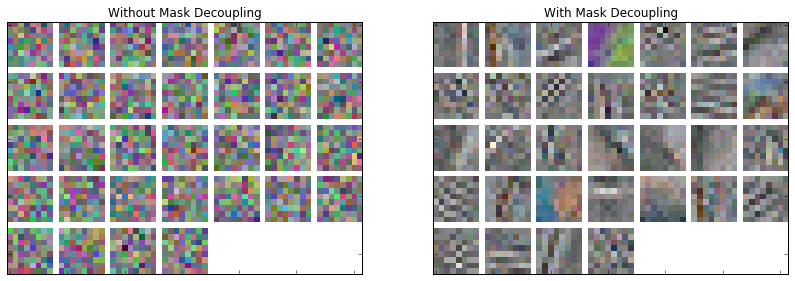

In [10]:
fig = plot.figure(figsize=(14,7))
plot.subplot(1, 2, 1)
plot.imview(util.tiledict(D1.squeeze()), fgrf=fig,
            title='Without Mask Decoupling')
plot.subplot(1, 2, 2)
plot.imview(util.tiledict(D2.squeeze()), fgrf=fig,
            title='With Mask Decoupling')
fig.show()

Display reference and training images.

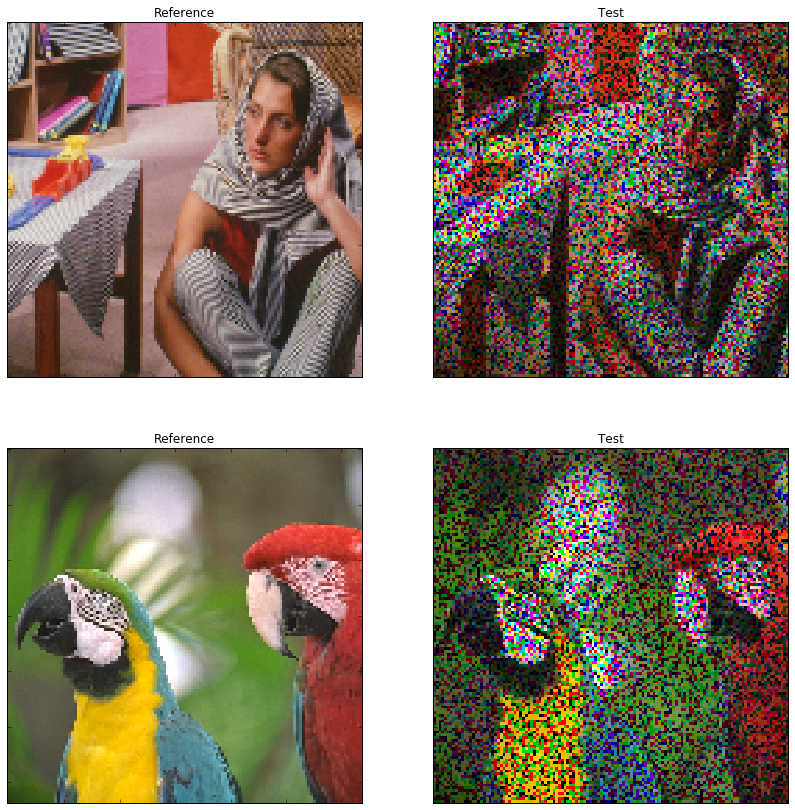

In [11]:
fig = plot.figure(figsize=(14,14))
plot.subplot(2, 2, 1)
plot.imview(S[...,0], fgrf=fig, title='Reference')
plot.subplot(2, 2, 2)
plot.imview(Sw[...,0], fgrf=fig, title='Test')
plot.subplot(2, 2, 3)
plot.imview(S[...,1], fgrf=fig, title='Reference')
plot.subplot(2, 2, 4)
plot.imview(Sw[...,1], fgrf=fig, title='Test')
fig.show()

Compare reconstructed images.

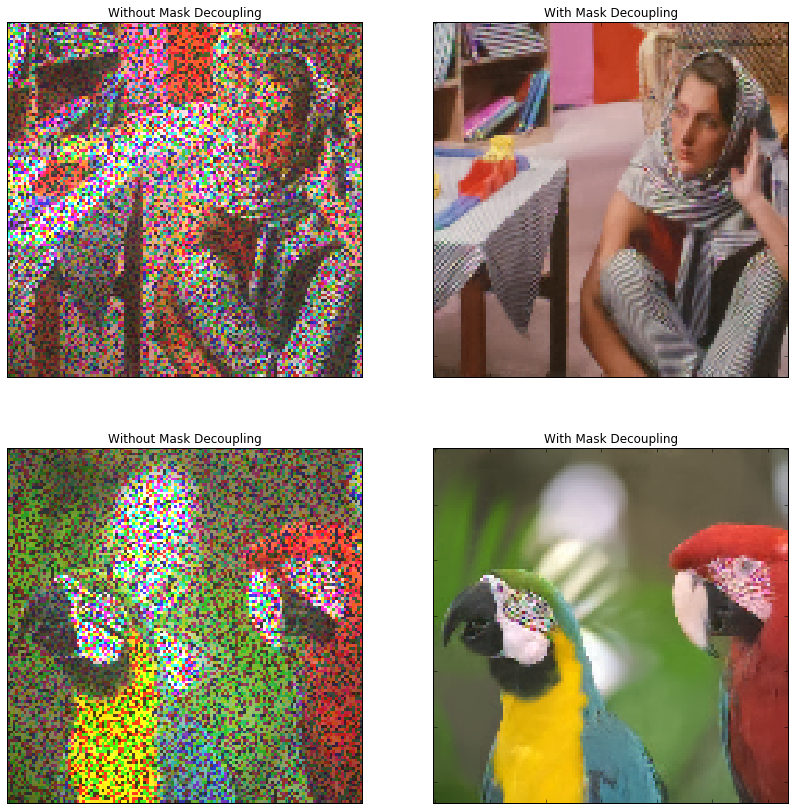

In [12]:
fig = plot.figure(figsize=(14,14))
plot.subplot(2, 2, 1)
plot.imview(sr1[...,0], fgrf=fig, title='Without Mask Decoupling')
plot.subplot(2, 2, 2)
plot.imview(sr2[...,0], fgrf=fig, title='With Mask Decoupling')
plot.subplot(2, 2, 3)
plot.imview(sr1[...,1], fgrf=fig, title='Without Mask Decoupling')
plot.subplot(2, 2, 4)
plot.imview(sr2[...,1], fgrf=fig, title='With Mask Decoupling')
fig.show()